In [ ]:
#import libraries
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [4]:
#time.strftime("%Y%m%d"))[0]：end with current time
#ime.strftime("%Y%m%d") returns date and second, therfore use[0] to only choose date
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
bitcoin_market_info['Volume']=bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-05-12,8441.44,8664.86,8223.50,8504.89,6821380000,143743000000
1,2018-05-11,9052.96,9052.96,8394.46,8441.49,8488520000,154142000000
2,2018-05-10,9325.96,9396.04,9040.52,9043.94,6906700000,158772000000
3,2018-05-09,9223.73,9374.76,9031.62,9325.18,7226890000,157013000000
4,2018-05-08,9380.87,9462.75,9127.77,9234.82,7415870000,159672000000


In [5]:
bitcoin_market_info.to_csv("/Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/bitcoin.csv")

In [5]:
train=bitcoin_market_info.loc[10:1840,:]
test=bitcoin_market_info.loc[1:10,:]

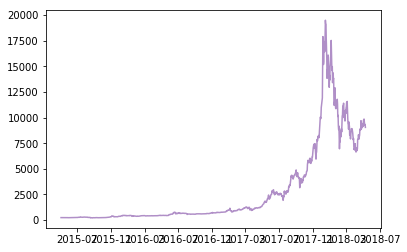

In [15]:
plt.plot(train['Date'].astype(datetime.datetime),train['Close'],color='#B08FC7', label='Training')
plt.show()

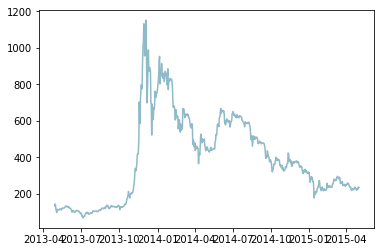

In [17]:
plt.plot(test['Date'].astype(datetime.datetime),test['Close'],color='#8FBAC8', label='Testing')
plt.show()

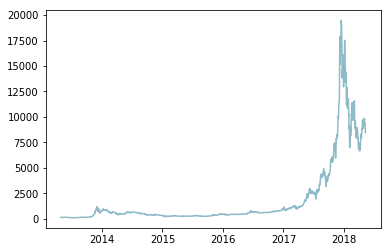

In [6]:
split_date='2015-05-04'
plt.plot(bitcoin_market_info[bitcoin_market_info['Date']<split_date]['Date'].astype(datetime.datetime),bitcoin_market_info[bitcoin_market_info['Date']<split_date]['Close'], color='#8FBAC8',label='Training')
plt.plot(bitcoin_market_info[bitcoin_market_info['Date']>=split_date]['Date'].astype(datetime.datetime),bitcoin_market_info[bitcoin_market_info['Date']>=split_date]['Close'], color='#8FBAC8',label='Testing')
plt.show()

In [6]:
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_close=train['Close']
train_close=pd.DataFrame(train_close)
train_close = scaler.fit_transform(train_close)
test_close=train['Close']
test_close=pd.DataFrame(test_close)
test_close = scaler.fit_transform(test_close)

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_close, look_back)
testX, testY = create_dataset(test_close, look_back)


In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys


compilation time :  0.012730836868286133


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [17]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1737 samples, validate on 92 samples
Epoch 1/10
1737/1737 [==============================] - 0s 262us/step - loss: 0.0283 - val_loss: 0.0062
Epoch 2/10
1737/1737 [==============================] - 0s 88us/step - loss: 0.0210 - val_loss: 0.0041
Epoch 3/10
1737/1737 [==============================] - 0s 88us/step - loss: 0.0144 - val_loss: 0.0039
Epoch 4/10
1737/1737 [==============================] - 0s 92us/step - loss: 0.0077 - val_loss: 0.0012
Epoch 5/10
1737/1737 [==============================] - 0s 91us/step - loss: 0.0028 - val_loss: 7.3300e-04
Epoch 6/10
1737/1737 [==============================] - 0s 77us/step - loss: 9.5754e-04 - val_loss: 4.8781e-06
Epoch 7/10
1737/1737 [==============================] - 0s 75us/step - loss: 7.5994e-04 - val_loss: 6.7252e-06
Epoch 8/10
1737/1737 [==============================] - 0s 76us/step - loss: 6.1939e-04 - val_loss: 3.8246e-05
Epoch 9/10
1737/1737 [==============================] - 0s 77us/step - loss: 6.5998e-04 - val_loss: 8

[[ 0.45474556]]
[[ 1.08806109]]
[[ 2.49591851]]
[[ 5.7065053]]
[[ 10.67559242]]
[[   8903.66796875]
 [  21208.3359375 ]
 [  48561.55859375]
 [ 110939.9453125 ]
 [ 207484.1875    ]]


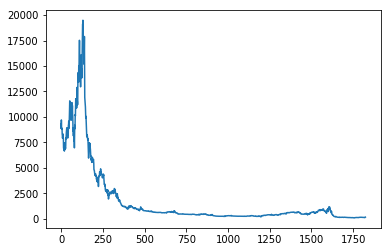

In [18]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)